In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data into a DataFrame
df = pd.read_csv('mbot_battery_log_2024.csv')

In [2]:
# Adjust utime to start from 0
df['utime'] = df['utime'] - df['utime'].iloc[0]

gap_threshold = 100  # Define the gap threshold
time_diff = df['utime'].diff()  # Calculate the difference between consecutive rows

In [3]:
# Check if any time difference exceeds the threshold
if (time_diff >= gap_threshold).any():
    gap_index = time_diff[time_diff >= gap_threshold].index[0]

    # Print the rows around the identified gap for verification
    print("Before adjustment:")
    print(df.loc[max(gap_index - 10, 0):min(gap_index + 10, len(df) - 1), 'utime'])

    # Step 3: Align everything after the gap to the last data before the gap
    last_timestamp_before_gap = df.loc[gap_index - 1, 'utime']

    # Shift all timestamps after the gap to align with the last timestamp before the gap
    df.loc[gap_index:, 'utime'] = df.loc[gap_index:, 'utime'] - df.loc[gap_index, 'utime'] + last_timestamp_before_gap

    # Print the adjusted timestamps
    print("\nAfter adjustment:")
    print(df.loc[max(gap_index - 10, 0):min(gap_index + 10, len(df) - 1), 'utime'])
else:
    print("No time gaps exceeding the threshold were found.")

No time gaps exceeding the threshold were found.


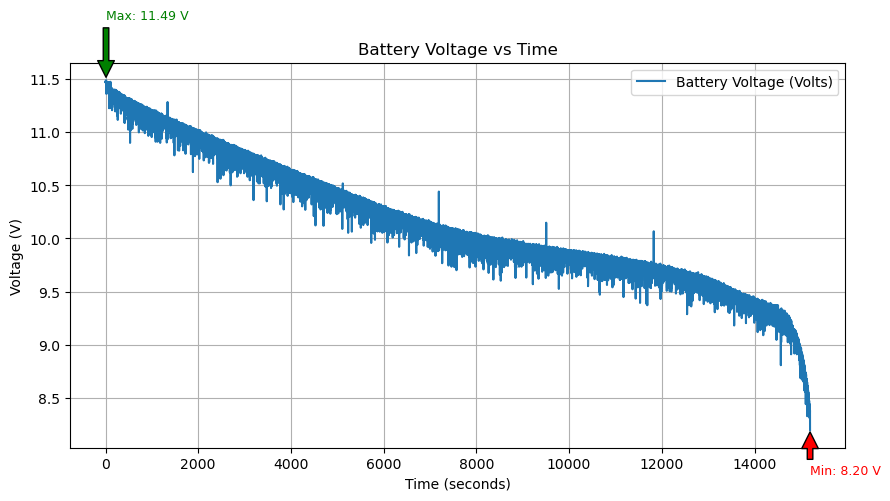

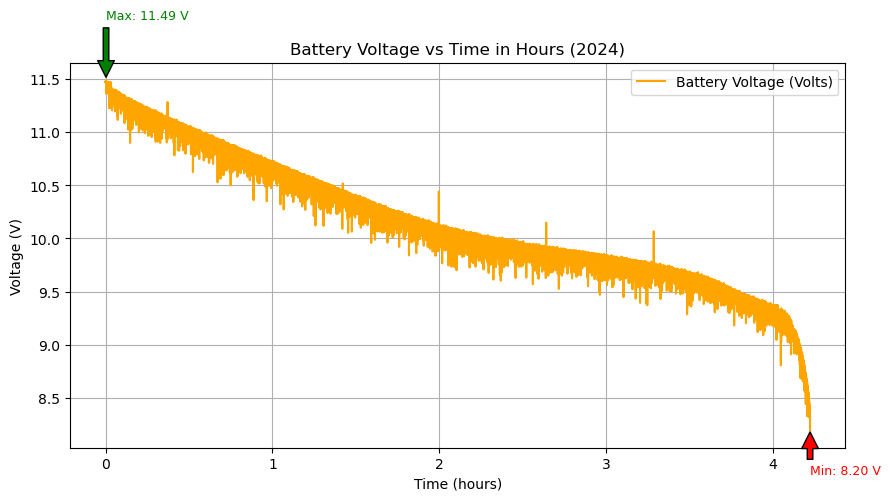

In [4]:
# Create a new column for hours after adjustment
df['hours'] = df['utime'] / 3600

# Plot the battery voltage vs time in seconds
plt.figure(figsize=(10, 5))
plt.plot(df['utime'], df['battery_voltage'], label='Battery Voltage (Volts)')

# Label the highest and lowest voltage values
max_voltage = df['battery_voltage'].max()
min_voltage = df['battery_voltage'].min()
plt.annotate(f'Max: {max_voltage:.2f} V', xy=(df['utime'][df['battery_voltage'].idxmax()], max_voltage),
             xytext=(df['utime'][df['battery_voltage'].idxmax()], max_voltage * 1.05),
             arrowprops=dict(facecolor='green', shrink=0.05), fontsize=9, color='green')
plt.annotate(f'Min: {min_voltage:.2f} V', xy=(df['utime'][df['battery_voltage'].idxmin()], min_voltage),
             xytext=(df['utime'][df['battery_voltage'].idxmin()], min_voltage * 0.95),
             arrowprops=dict(facecolor='red', shrink=0.05), fontsize=9, color='red')

# Label the axes for the first plot
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage (V)')

# Add a title
plt.title('Battery Voltage vs Time')

# Add a grid for better readability
plt.grid(True)

# Show the legend and plot
plt.legend()
plt.show()

# Plot the battery voltage vs time in hours
plt.figure(figsize=(10, 5))
plt.plot(df['hours'], df['battery_voltage'], label='Battery Voltage (Volts)', color='orange')

# Label the highest and lowest voltage values
plt.annotate(f'Max: {max_voltage:.2f} V', xy=(df['hours'][df['battery_voltage'].idxmax()], max_voltage),
             xytext=(df['hours'][df['battery_voltage'].idxmax()], max_voltage * 1.05),
             arrowprops=dict(facecolor='green', shrink=0.05), fontsize=9, color='green')
plt.annotate(f'Min: {min_voltage:.2f} V', xy=(df['hours'][df['battery_voltage'].idxmin()], min_voltage),
             xytext=(df['hours'][df['battery_voltage'].idxmin()], min_voltage * 0.95),
             arrowprops=dict(facecolor='red', shrink=0.05), fontsize=9, color='red')

# Label the axes for the second plot
plt.xlabel('Time (hours)')
plt.ylabel('Voltage (V)')

# Add a title for the second plot
plt.title('Battery Voltage vs Time in Hours (2024)')

# Add a grid for better readability
plt.grid(True)

# Show the legend and plot
plt.legend()
plt.show()